In [10]:
import numpy as np


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [17]:
from tensorflow.keras.datasets import cifar10

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


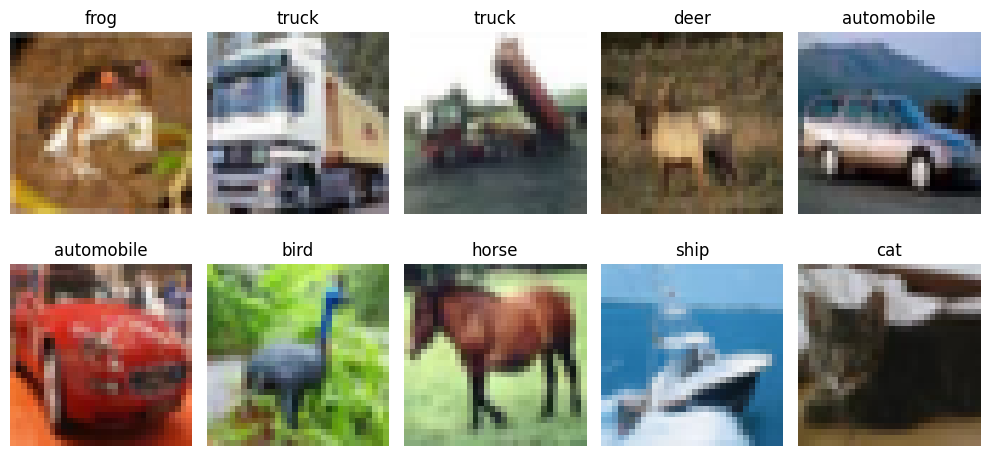

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values (0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Optional: class names for visualization later
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 116ms/step - accuracy: 0.4028 - loss: 1.6302 - val_accuracy: 0.6247 - val_loss: 1.0660
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.6662 - loss: 0.9592 - val_accuracy: 0.6552 - val_loss: 0.9731
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 115ms/step - accuracy: 0.7272 - loss: 0.7813 - val_accuracy: 0.7062 - val_loss: 0.8377
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 114ms/step - accuracy: 0.7663 - loss: 0.6709 - val_accuracy: 0.7030 - val_loss: 0.8552
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 117ms/step - accuracy: 0.8009 - loss: 0.5632 - val_accuracy: 0.7087 - val_loss: 0.8796
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 114ms/step - accuracy: 0.8366 - loss: 0.4714 - val_accuracy: 0.7163 - val_loss: 0.8867
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 114ms/step - accuracy: 0.8657 - loss: 0.3778 - val_accuracy: 0.7129 - val_loss: 1.0008
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - ac

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 - 9s - 30ms/step - accuracy: 0.6996 - loss: 1.3394
Test Accuracy: 0.70


In [13]:
from sklearn.metrics import classification_report, confusion_matrix


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
              precision    recall  f1-score   support

    airplane       0.69      0.78      0.73      1000
  automobile       0.82      0.85      0.83      1000
        bird       0.60      0.56      0.58      1000
         cat       0.50      0.49      0.50      1000
        deer       0.64      0.62      0.63      1000
         dog       0.56      0.66      0.60      1000
        frog       0.79      0.74      0.77      1000
       horse       0.75      0.77      0.76      1000
        ship       0.86      0.75      0.81      1000
       truck       0.83      0.77      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



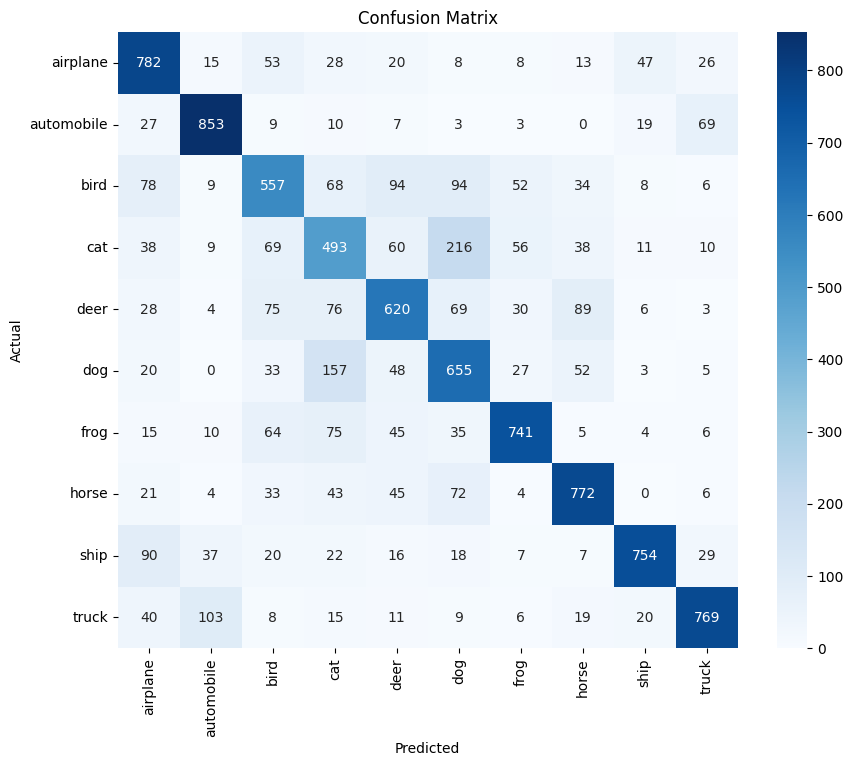

In [18]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
